# Imports

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import time

from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

np.random.seed(0)
%matplotlib inline


# Comparison of the K-Means and MiniBatchKMeans clustering algorithms

We want to compare the performance of the MiniBatchKMeans and KMeans:
the MiniBatchKMeans is faster, but gives slightly different results (see
`mini_batch_kmeans`).

We will cluster a set of data, first with KMeans and then with
MiniBatchKMeans, and plot the results.
We will also plot the points that are labelled differently between the two
algorithms.


## Generate the data

We start by generating the circles of data to be clustered.



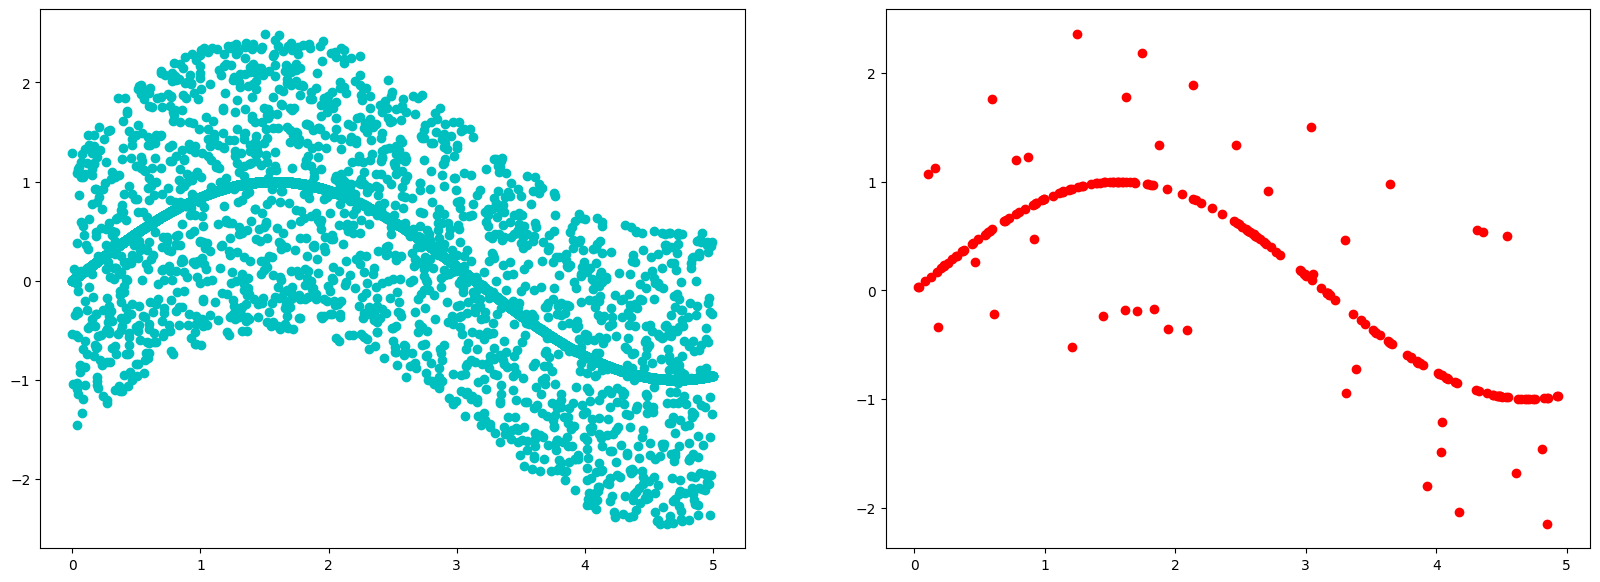

In [2]:
rng = np.random.RandomState(42)

X = 5 * rng.rand(10000, 1)
Y = np.sin(X).ravel()

# Add noise to targets
Y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
ax.scatter(X, Y, c="c")
ax = fig.add_subplot(1,2,2)
ax.scatter(X[:200], Y[:200], c="r")

## Compute regression with SVR



In [3]:
svr = SVR(kernel="rbf", gamma=0.1)
t0 = time.time()
svr.fit(X, Y)
t_batch = time.time() - t0

## Compute regression with RidgeRegression



In [4]:
rr = KernelRidge(kernel="rbf", gamma=0.1)
t0 = time.time()
rr.fit(X, Y)
t_mini_batch = time.time() - t0

## Compute prediction




In [5]:
X_plot = np.linspace(0, 5, 10000)[:, None]
svr_y = svr.predict(X_plot)
rr_y = rr.predict(X_plot)

## Plotting the results



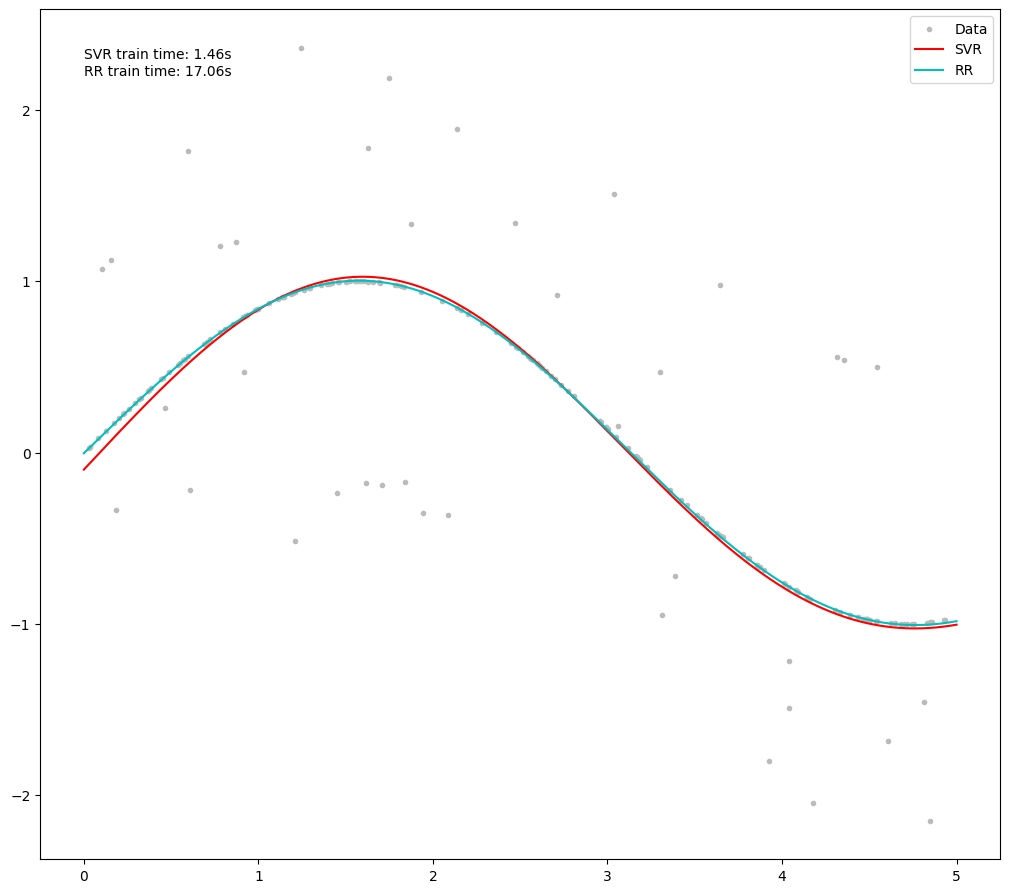

In [6]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

plt.scatter(X[:200], Y[:200], color="#BBBBBB", marker=".", label="Data")
# SVC
plt.plot(X_plot, svr_y, c="r", label="SVR")
# SGD
plt.plot(X_plot, rr_y, c="c", label="RR")

plt.text(0, 2.3, "SVR train time: %.2fs" % (t_batch))
plt.text(0, 2.2, "RR train time: %.2fs" % (t_mini_batch))
plt.legend()

plt.show()